In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [8]:
new_df.catch.unique()

array([1, 0])

In [9]:
len(new_df)

3648

In [10]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [11]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [12]:
len(new_df)

2590

In [13]:
new_df.loc[:,'AbsError'] = np.abs(new_df['Error'])

In [14]:
new_df['BigError'] = 0
new_df.loc[new_df['AbsError']>0.15,'BigError'] = 1
new_df['BigError'].sum()

33

In [15]:
new_df.loc[:,'Task'] = new_df['Task'].replace([1,2,3],['N+', 'N-/+', 'Word'])

In [16]:
new_df.Task

2       Word
4       Word
5       Word
6       Word
7       Word
8       Word
9       Word
10      Word
11      Word
12      Word
13      Word
16      N-/+
17      N-/+
18      N-/+
20      N-/+
21      N-/+
22      N-/+
24      N-/+
25      N-/+
26      N-/+
27      N-/+
28      N-/+
30      N-/+
33        N+
34        N+
35        N+
36        N+
37        N+
38        N+
40        N+
        ... 
3602    N-/+
3604    N-/+
3605    N-/+
3607    N-/+
3608    N-/+
3609    N-/+
3611    N-/+
3614    N-/+
3615    N-/+
3619    Word
3622    Word
3623    Word
3624    Word
3625    Word
3626    Word
3627    Word
3629    Word
3630    Word
3631    Word
3633      N+
3634      N+
3636      N+
3637      N+
3638      N+
3641      N+
3643      N+
3644      N+
3645      N+
3646      N+
3647      N+
Name: Task, dtype: object

In [17]:
pal = sns.color_palette()

In [18]:
new_df = new_df.sort_values(by='Line_pct')

In [19]:
np.sort(new_df.Subject.unique())

array(['s_02003', 's_02004', 's_02005', 's_02006', 's_02007', 's_02010',
       's_02011', 's_02012', 's_02014', 's_02015', 's_02016', 's_02017',
       's_02018', 's_02019', 's_02021', 's_02022', 's_02023', 's_02024',
       's_02027'], dtype=object)

In [20]:
#new_df.loc[:,:] = new_df[new_df['Subject']!='s_04116']

In [21]:
#df.loc[:,:] = new_df[new_df['Subject']!='s_04117']

In [22]:
#df.loc[:,:] = new_df[new_df['Subject']!='s_04104']

In [23]:
#new_df = new_df[pd.notnull(new_df['Subject'])]

In [24]:
len(new_df)

2590

In [25]:
np.sort(new_df.Subject.unique())

array(['s_02003', 's_02004', 's_02005', 's_02006', 's_02007', 's_02010',
       's_02011', 's_02012', 's_02014', 's_02015', 's_02016', 's_02017',
       's_02018', 's_02019', 's_02021', 's_02022', 's_02023', 's_02024',
       's_02027'], dtype=object)

In [26]:
plt_df = new_df.copy()
plt_df = plt_df.groupby(['Task','Line_pct','Subject']).mean()
plt_df.to_csv('plot_data.csv', sep='\t')
plt_df = pd.read_csv('plot_data.csv',sep='\t')

## RT boxplots

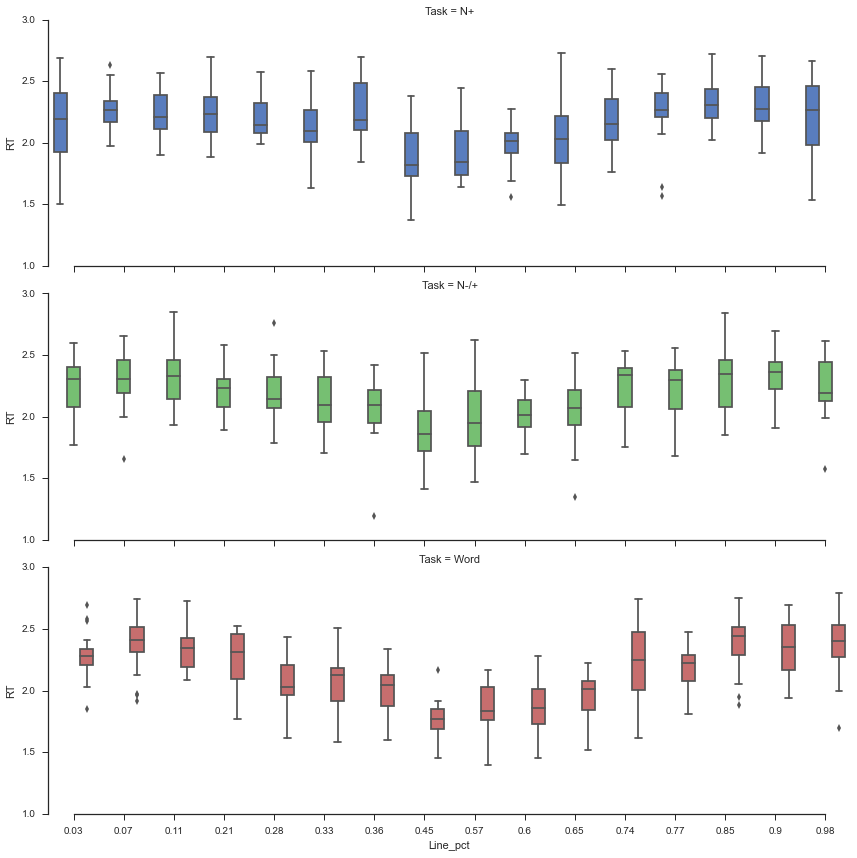

In [27]:
ax = sns.factorplot(x='Line_pct',y='RT',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

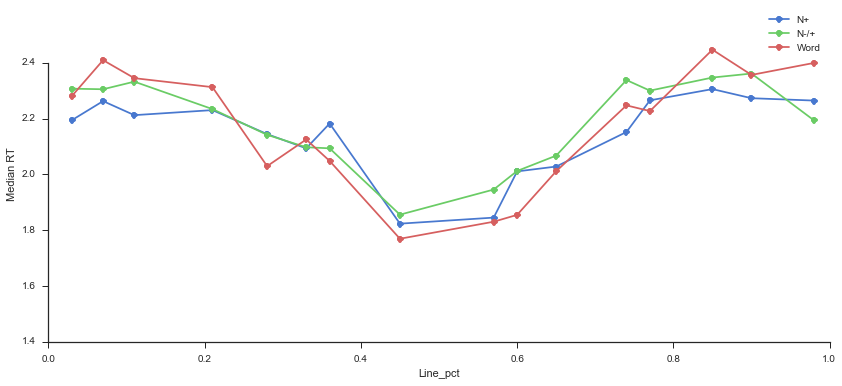

In [28]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['RT'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([1.4,2.6])
plt.xlabel('Line_pct')
plt.ylabel('Median RT')
sns.despine(trim=True)

/Users/frankanayet/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


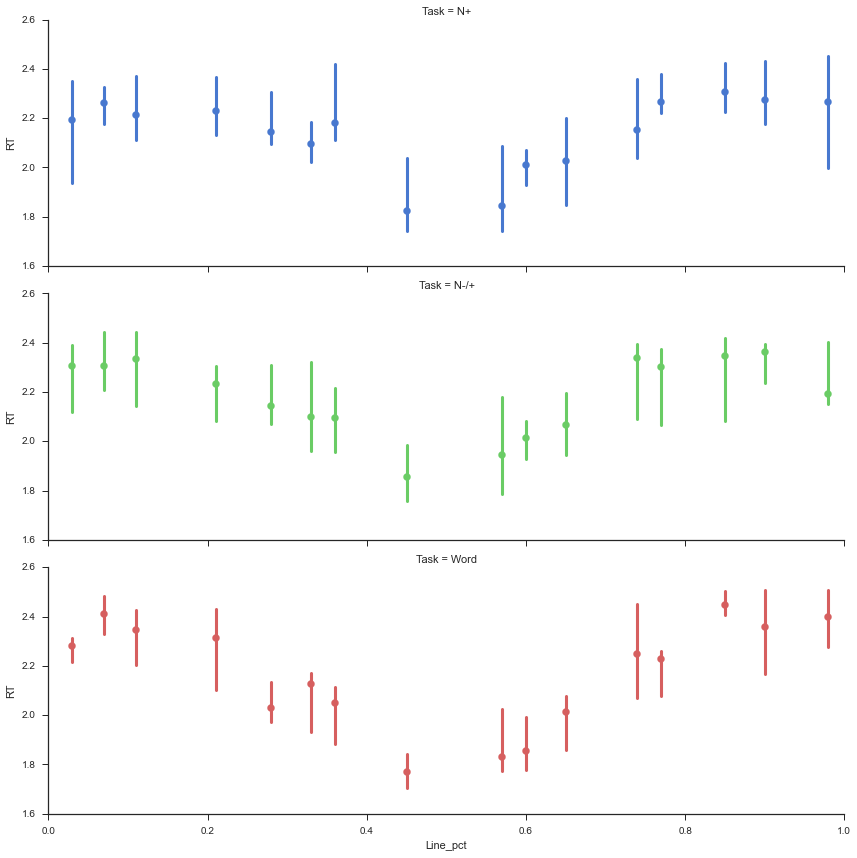

In [29]:
g = sns.FacetGrid(plt_df, row='Task', hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'RT', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

In [47]:
plt_df.groupby(['Subject', 'Task'])['RT'].count()

Subject  Task
s_02003  N+      16
         N-/+    16
         Word    16
s_02004  N+      16
         N-/+    16
         Word    16
s_02005  N+      16
         N-/+    16
         Word    16
s_02006  N+      16
         N-/+    16
         Word    16
s_02007  N+      16
         N-/+    16
         Word    16
s_02010  N+      16
         N-/+    16
         Word    16
s_02011  N+      16
         N-/+    16
         Word    16
s_02012  N+      16
         N-/+    16
         Word    16
s_02014  N+      16
         N-/+    16
         Word    16
s_02015  N+      16
         N-/+    16
         Word    16
s_02016  N+      16
         N-/+    16
         Word    16
s_02017  N+      16
         N-/+    16
         Word    15
s_02018  N+      16
         N-/+    16
         Word    16
s_02019  N+      16
         N-/+    16
         Word    16
s_02021  N+      16
         N-/+    16
         Word    16
s_02022  N+      16
         N-/+    16
         Word    16
s_02023  N+      16
      

In [53]:
plt_df.loc[plt_df['Subject']=='s_02017',['Task','Line_pct','AbsError']]

,Task,Line_pct,AbsError
11,N+,0.03,0.016520
30,N+,0.07,0.040132
49,N+,0.11,0.039780
68,N+,0.21,0.041601
87,N+,0.28,0.031101
106,N+,0.33,0.019824
125,N+,0.36,0.137533
144,N+,0.45,0.020485
163,N+,0.57,0.017137
182,N+,0.60,0.016520


In [30]:
len(plt_df.loc[plt_df['Task']=='N+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values())

ValueError: operands could not be broadcast together with shapes (304,) (303,) 

Subtraction is being calculates as 1. Take mean for each subject on each position(3 values),then subtract from each (subject,value) pair in the N+ task the value from the same (subject,value) pair in the word task. Then take the median of the result.

In [31]:
plt_df.loc[plt_df['Task']=='N+','RT-'] = plt_df.loc[plt_df['Task']=='N+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values()

ValueError: operands could not be broadcast together with shapes (304,) (303,) 

In [32]:
plt_df.loc[plt_df['Task']=='N-/+','RT-'] = plt_df.loc[plt_df['Task']=='N-/+','RT'].get_values() - plt_df.loc[plt_df['Task']=='Word','RT'].get_values()

ValueError: operands could not be broadcast together with shapes (304,) (303,) 

In [33]:
plt_df.loc[plt_df['Task']=='N+',['RT','Word']].head(15)

,RT,Word
0,2.313997,NaN
1,1.909615,NaN
2,2.685679,NaN
3,1.937420,NaN
4,2.165762,NaN
5,1.505116,NaN
6,2.153144,NaN
7,2.558355,NaN
8,2.352129,NaN
9,1.698293,NaN


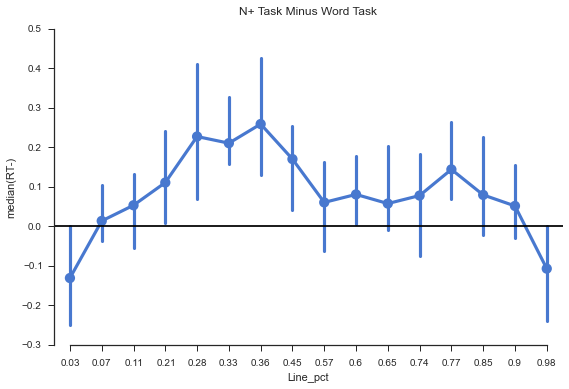

In [65]:
ax = sns.pointplot(x=plt_df.loc[plt_df['Task']=='N+','Line_pct'],y=plt_df.loc[plt_df['Task']=='N+','RT-'],estimator=np.median,size=4,aspect=3)
plt.axhline(y=0, color='black')
plt.title('N+ Task Minus Word Task', y=1.03)
sns.despine(trim=True)
plt.tight_layout()

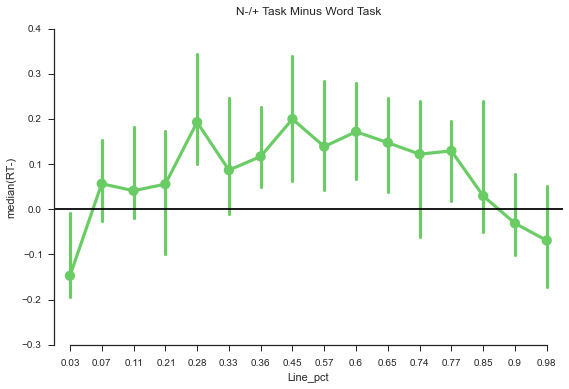

In [66]:
ax = sns.pointplot(x=plt_df.loc[plt_df['Task']=='N-/+','Line_pct'],y=plt_df.loc[plt_df['Task']=='N-/+','RT-'],estimator=np.median,size=4,aspect=3,color=pal[1])
plt.axhline(y=0, color='black')
plt.title('N-/+ Task Minus Word Task',y=1.03)
sns.despine(trim=True)
plt.tight_layout()

# MAE boxplots

With means for each subject

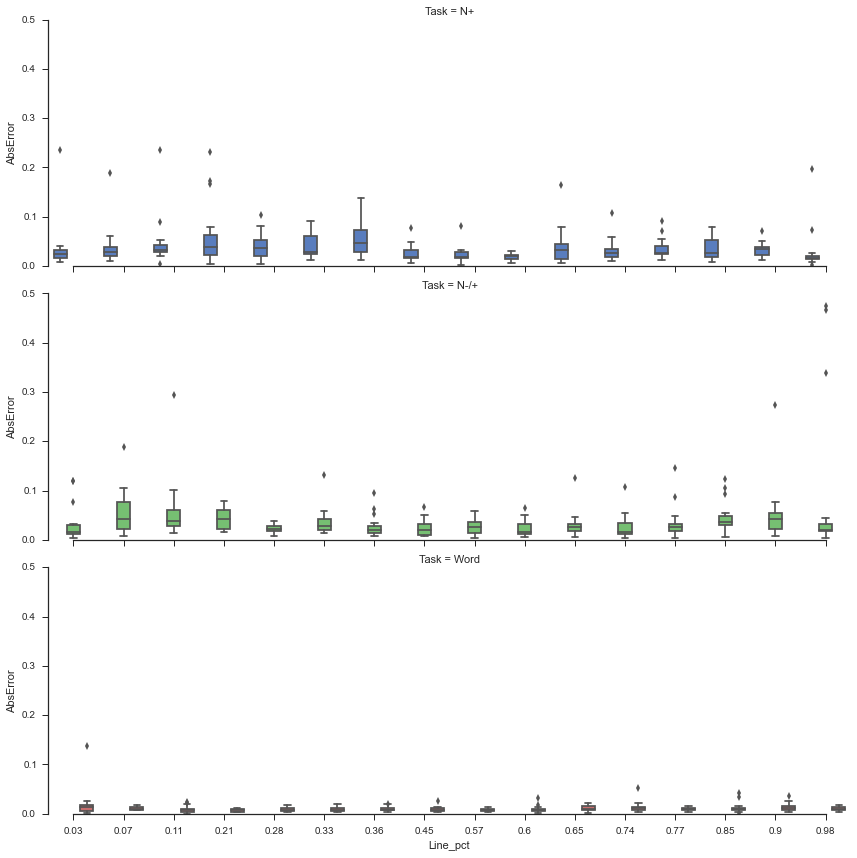

In [54]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

Y axis different to see details on all plots

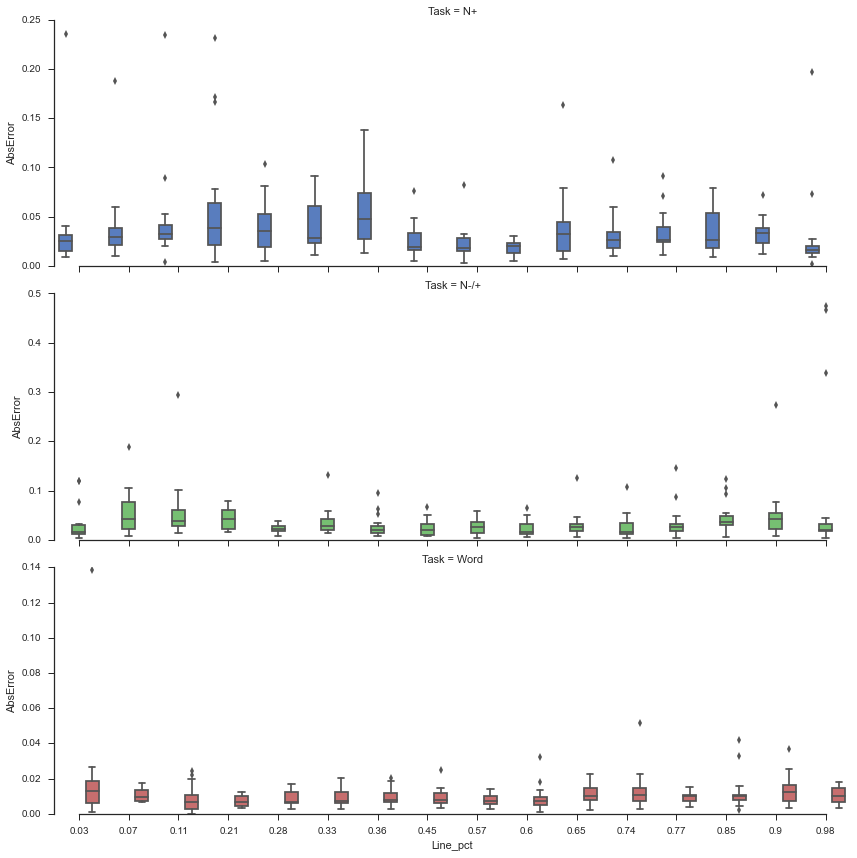

In [55]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=False)
sns.despine(trim=True)

In [56]:
median_df = new_df.copy()

In [57]:
median_df = median_df.groupby(['Task','Line_pct','Subject']).median()

In [64]:
median_df.to_csv('plot_data_median.csv', sep='\t')

In [65]:
median_df = pd.read_csv('plot_data_median.csv',sep='\t')

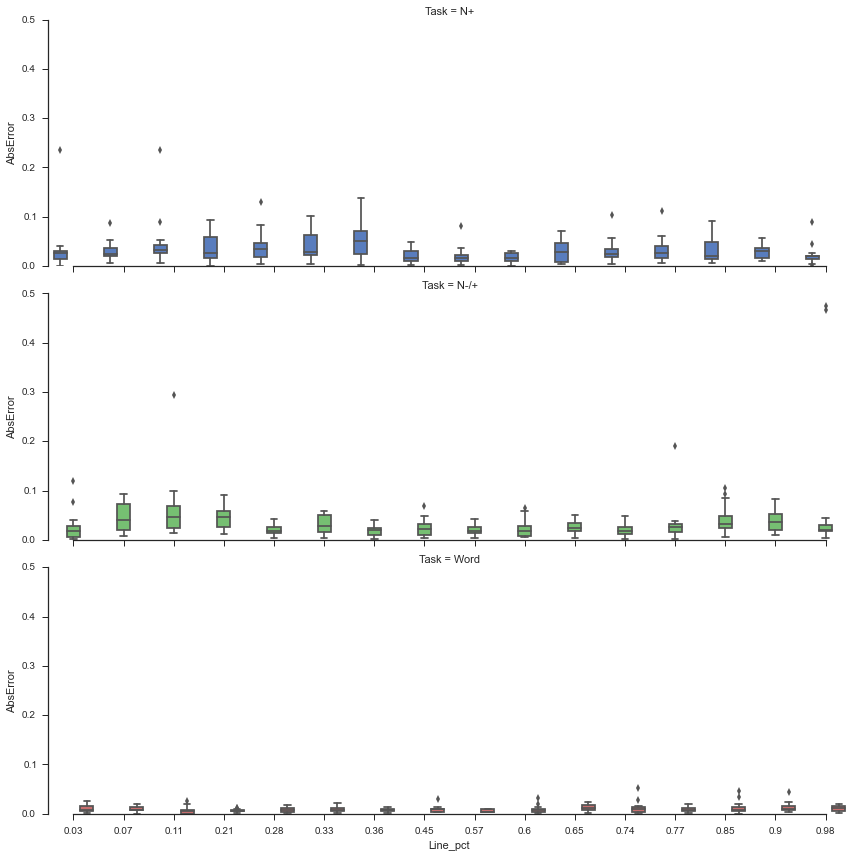

In [66]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=median_df,kind='box',size=4,aspect=3)
sns.despine(trim=True)

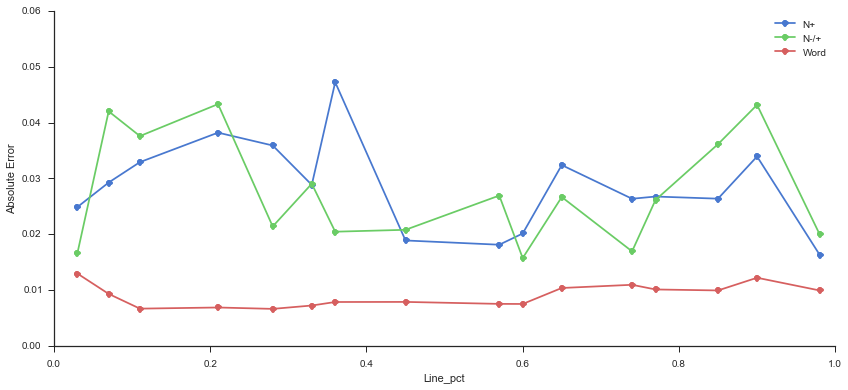

In [67]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['AbsError'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Absolute Error')
sns.despine(trim=True)

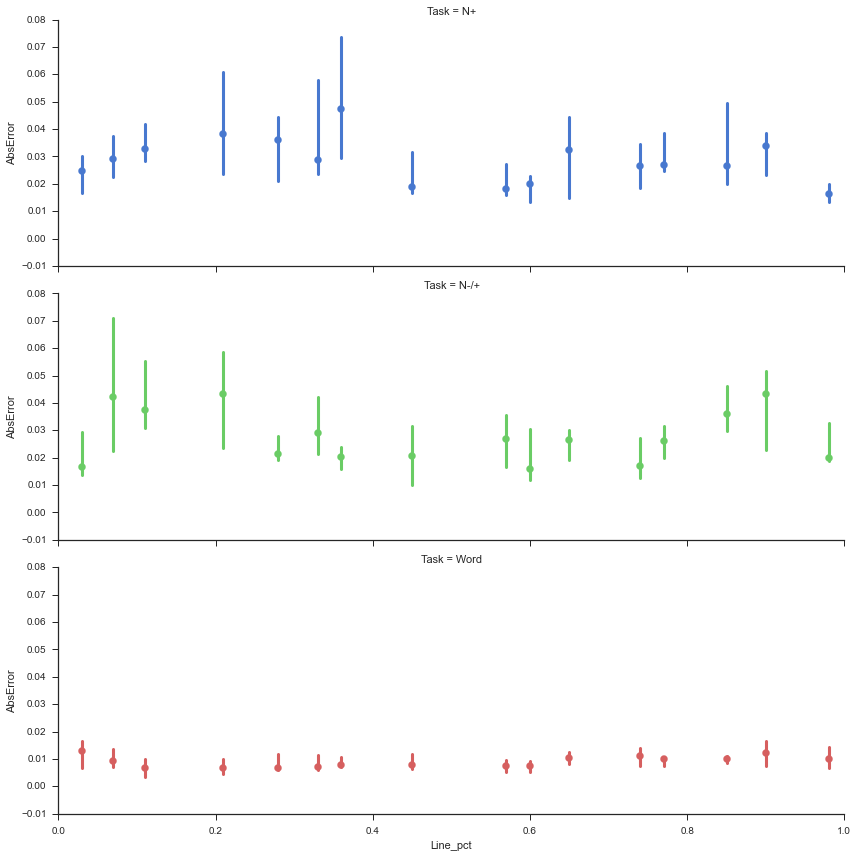

In [68]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'AbsError', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

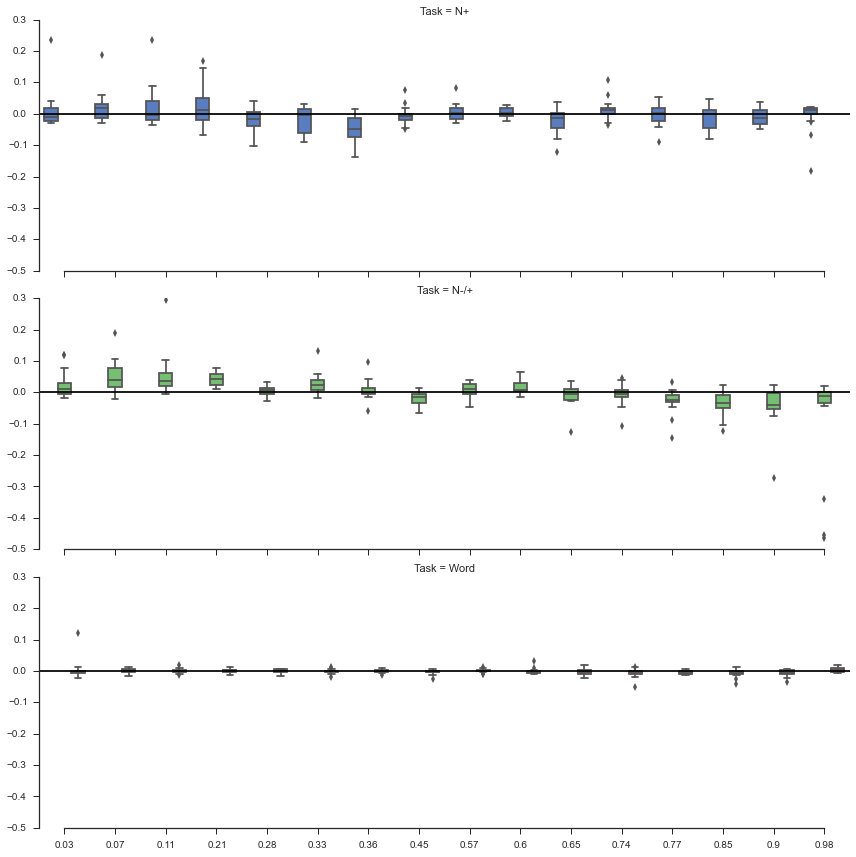

In [69]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

## Remove Big Errors

In [70]:
plt_df = new_df.copy()

In [71]:
len(plt_df)

2590

In [72]:
plt_df = plt_df[plt_df['BigError']==0]

In [73]:
len(plt_df)

2557

In [74]:
plt_df.BigError.unique()

array([0])

In [75]:
plt_df = plt_df.groupby(['Task','Line_pct','Subject']).mean()
plt_df.to_csv('plot_data.csv', sep='\t')
plt_df = pd.read_csv('plot_data.csv',sep='\t')

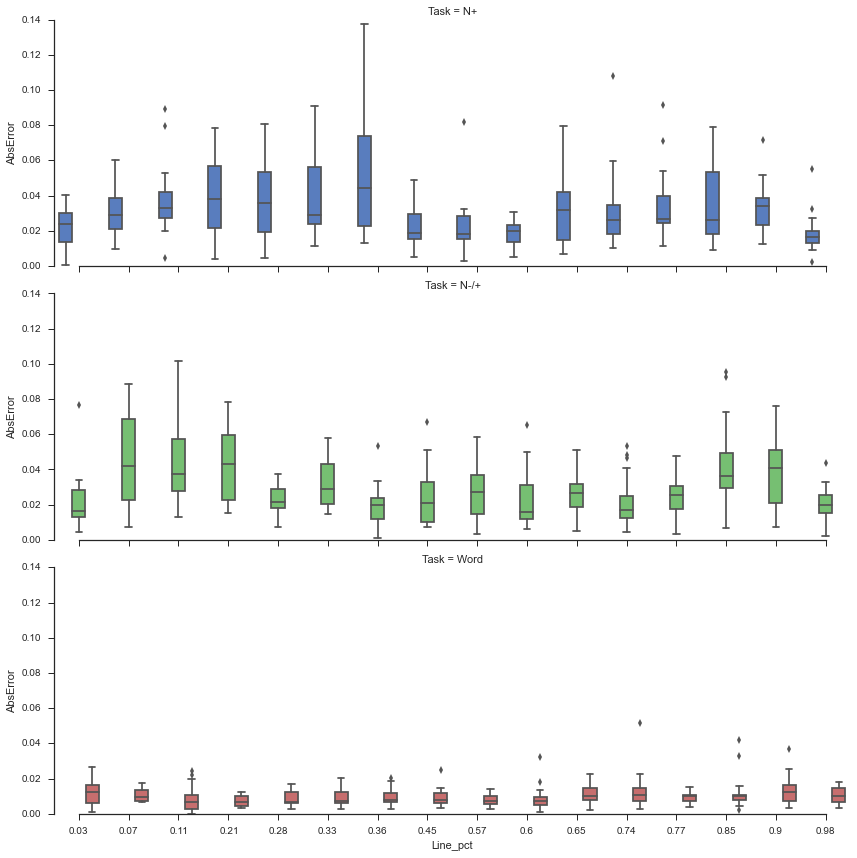

In [76]:
ax = sns.factorplot(x='Line_pct',y='AbsError',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)

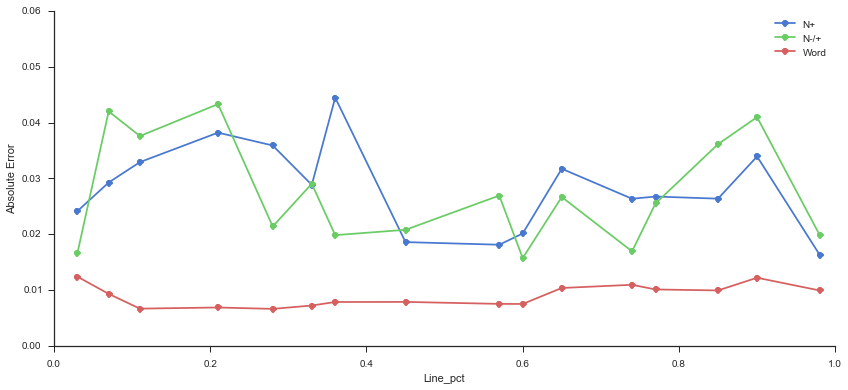

In [77]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['AbsError'].median(),'-o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Absolute Error')
sns.despine(trim=True)

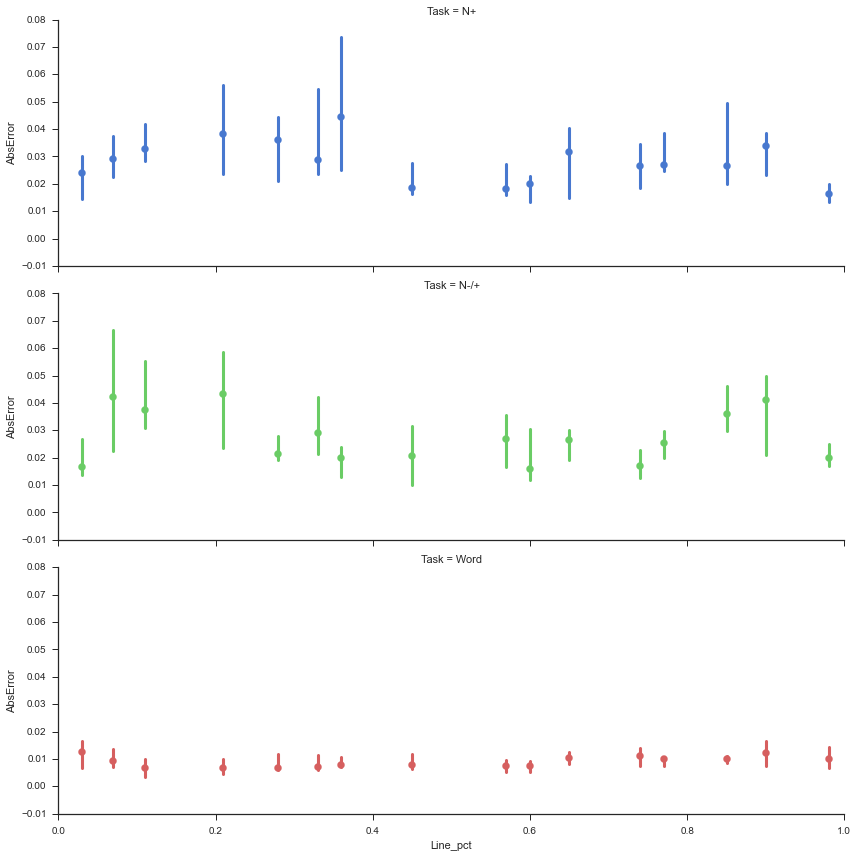

In [78]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'AbsError', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

## Signed Error boxplot

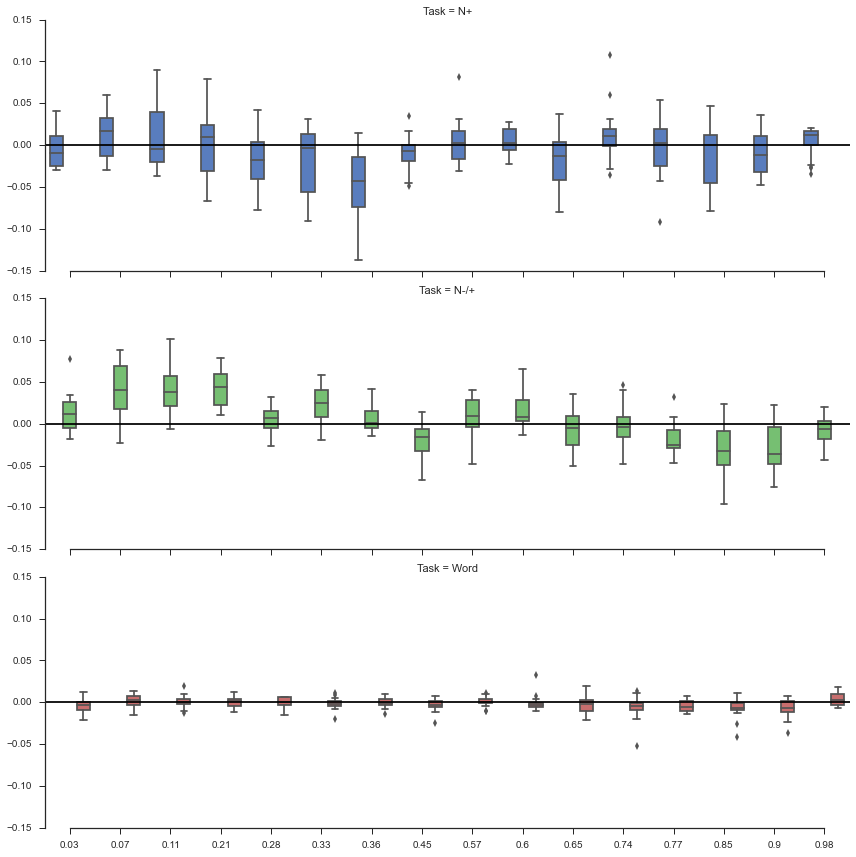

In [79]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=plt_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
ax.map(plt.axhline, y=0, color='black')

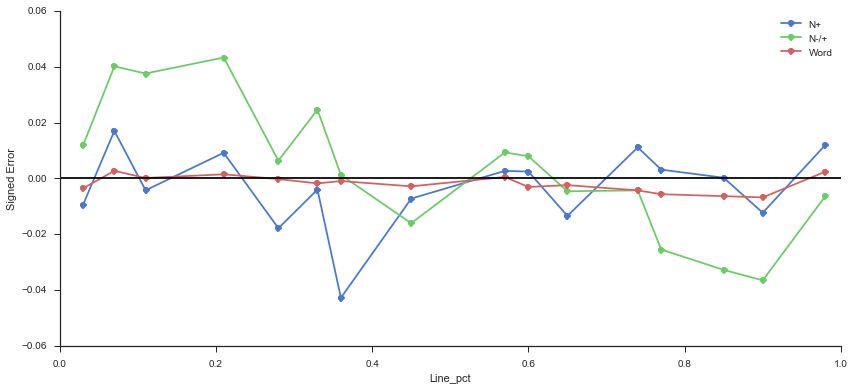

In [80]:
plt.figure(figsize=(14,6))
for key,grp in plt_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([-.06,0.06])
plt.xlabel('Line_pct')
plt.ylabel('Signed Error')
sns.despine(trim=True)

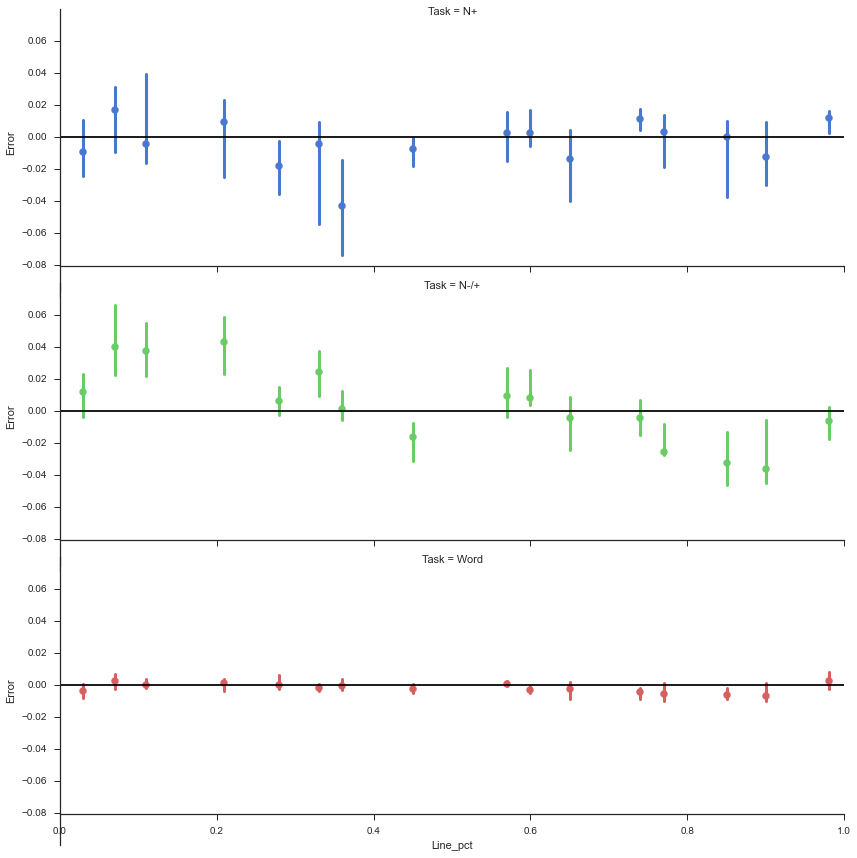

In [81]:
g = sns.FacetGrid(plt_df, row='Task',hue='Task',palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'Error', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)
for ax in g.axes.flat:
    ax.plot((0,1),(0,0),c='black')

## SD boxplot

In [82]:
sd_df = new_df.copy()

In [83]:
sd_df = sd_df[sd_df['BigError']==0]

In [84]:
len(sd_df)

2557

In [85]:
sd_df = sd_df.groupby(['Task','Line_pct','Subject']).std()

In [86]:
sd_df.to_csv('plot_data_SD.csv', sep='\t')
sd_df = pd.read_csv('plot_data_SD.csv',sep='\t')

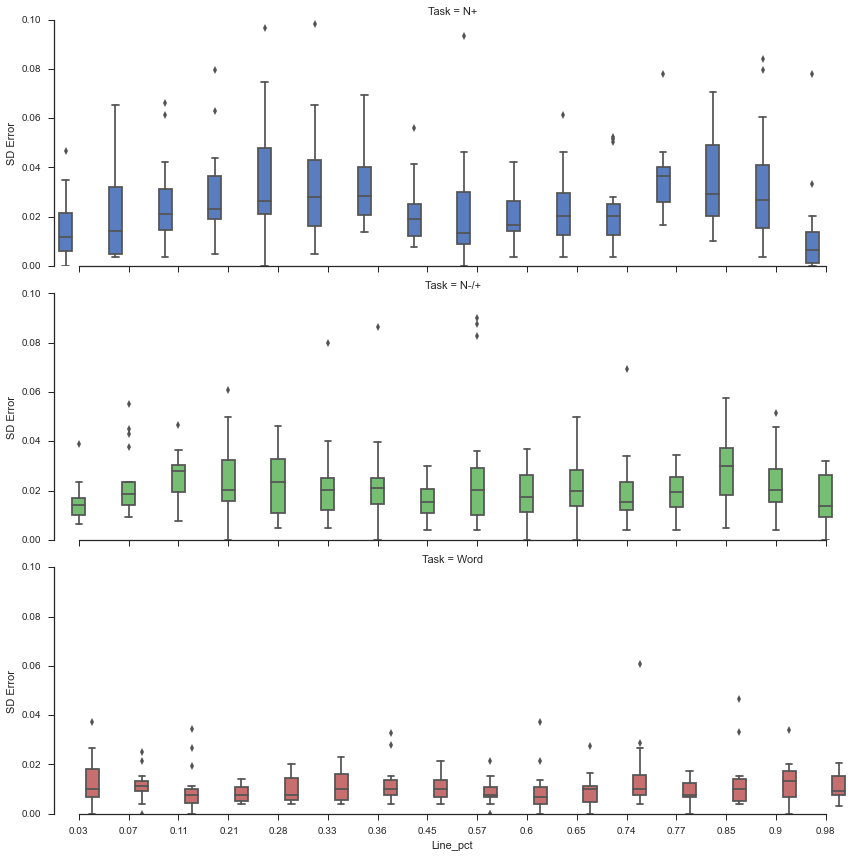

In [87]:
ax = sns.factorplot(x='Line_pct',y='Error',hue='Task',row='Task',data=sd_df,kind='box',size=4,aspect=3,sharey=True)
sns.despine(trim=True)
(ax.set_axis_labels("Line_pct",'SD Error'))

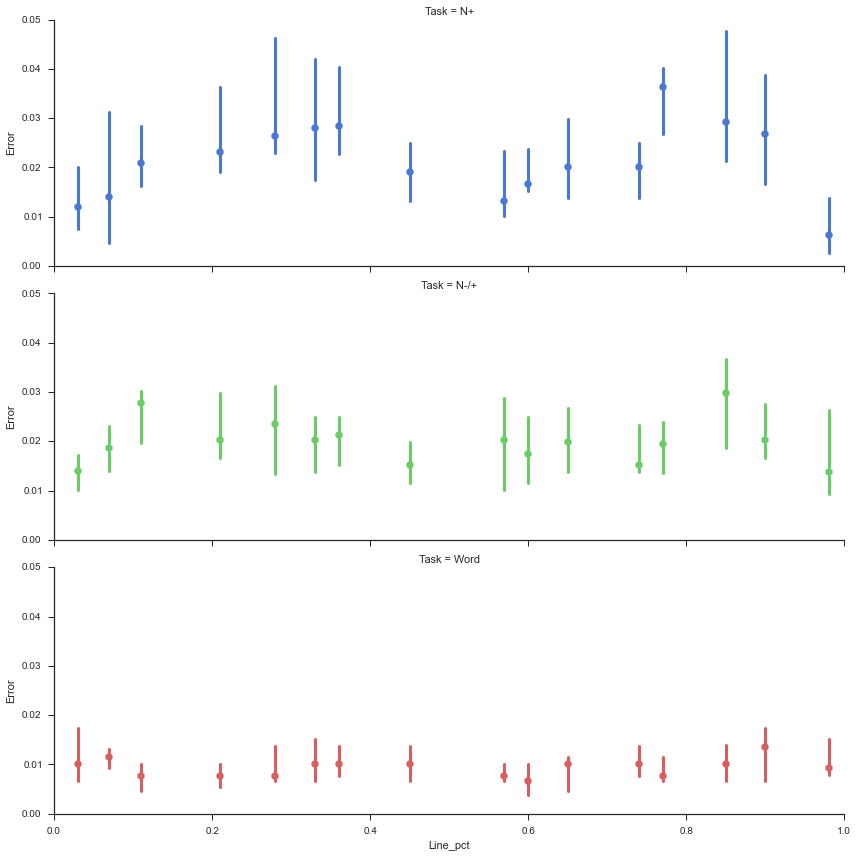

In [88]:
g = sns.FacetGrid(sd_df,hue='Task', row= 'Task', palette=pal,size=4,aspect=3)
g = g.map(sns.regplot, 'Line_pct', 'Error', fit_reg=False,x_estimator=np.median).set(xlim=(0,1))
sns.despine(trim=True)

## SD vs Median placement instead of Correct Placement

In [89]:
median_scores = plt_df.groupby(['Task', 'Line_pct'])['Response'].median()

In [90]:
median_scores

Task  Line_pct
N+    0.03        0.020558
      0.07        0.087004
      0.11        0.105727
      0.21        0.219163
      0.28        0.262115
      0.33        0.325991
      0.36        0.317181
      0.45        0.442731
      0.57        0.572687
      0.60        0.602423
      0.65        0.636564
      0.74        0.751101
      0.77        0.773128
      0.85        0.850220
      0.90        0.887665
      0.98        0.991924
N-/+  0.03        0.041850
      0.07        0.110132
      0.11        0.147577
      0.21        0.253304
      0.28        0.286344
      0.33        0.354626
      0.36        0.361233
      0.45        0.433921
      0.57        0.579295
      0.60        0.607930
      0.65        0.645374
      0.74        0.735683
      0.77        0.744493
      0.85        0.817181
      0.90        0.863436
      0.98        0.973568
Word  0.03        0.026432
      0.07        0.072687
      0.11        0.110132
      0.21        0.211454
      0.28   

In [91]:
sd_medians = {}
for key,grp in sd_df.groupby('Task'):
    sd_medians[key] = grp.groupby('Line_pct')['Error'].median()

In [92]:
sd_medians['N+']

Line_pct
0.03    0.011965
0.07    0.014018
0.11    0.020983
0.21    0.023206
0.28    0.026432
0.33    0.028035
0.36    0.028419
0.45    0.019075
0.57    0.013216
0.60    0.016630
0.65    0.020188
0.74    0.020188
0.77    0.036394
0.85    0.029158
0.90    0.026706
0.98    0.006358
Name: Error, dtype: float64

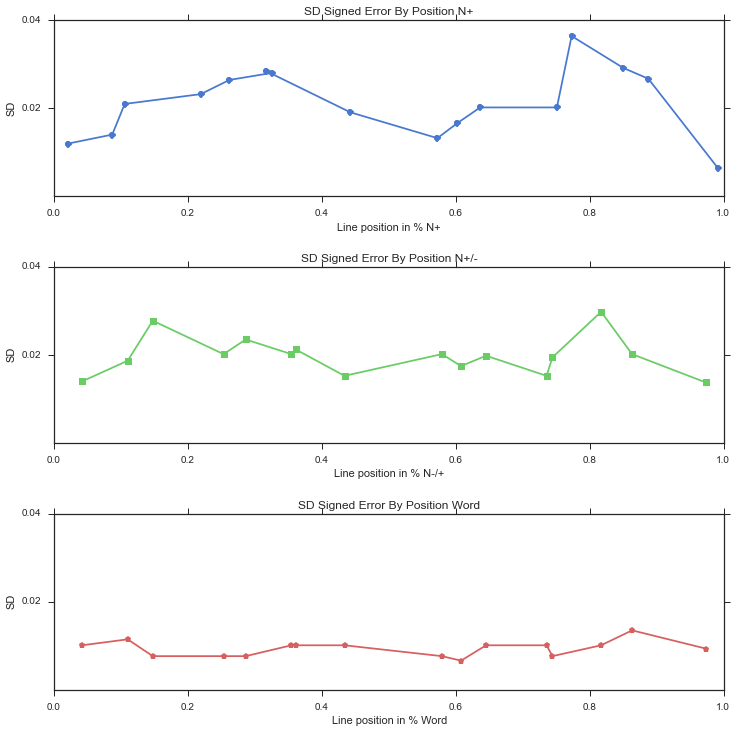

In [93]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(median_scores['N+'], sd_medians['N+'], 'o-', color=pal[0])
plt.title('SD Signed Error By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

fig2 = plt.subplot(3,1,2)
fig2.plot(median_scores['N-/+'], sd_medians['N-/+'], color=pal[1], marker='s')
plt.title('SD Signed Error By Position N+/-')
plt.xlabel('Line position in % N-/+', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

fig3 = plt.subplot(3,1,3)
fig3.plot(median_scores['N-/+'], sd_medians['Word'], color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

plt.subplots_adjust(hspace=.4)

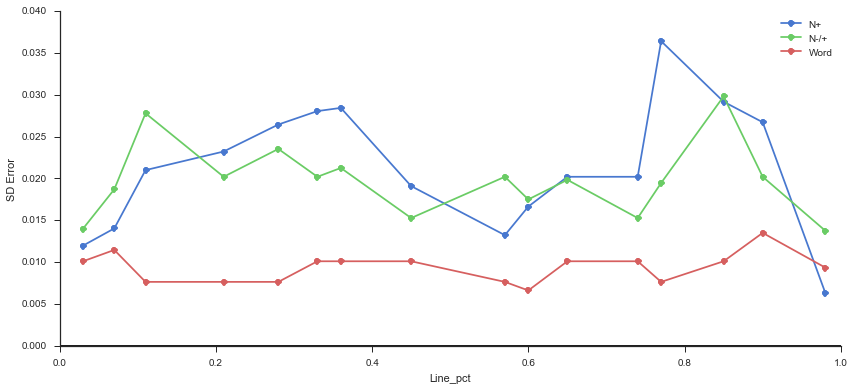

In [94]:
plt.figure(figsize=(14,6))
for key,grp in sd_df.groupby('Task'):
    print 
    plt.plot(grp.Line_pct.unique(),grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([0,0.04])
plt.xlabel('Line_pct')
plt.ylabel('SD Error')
sns.despine(trim=True)

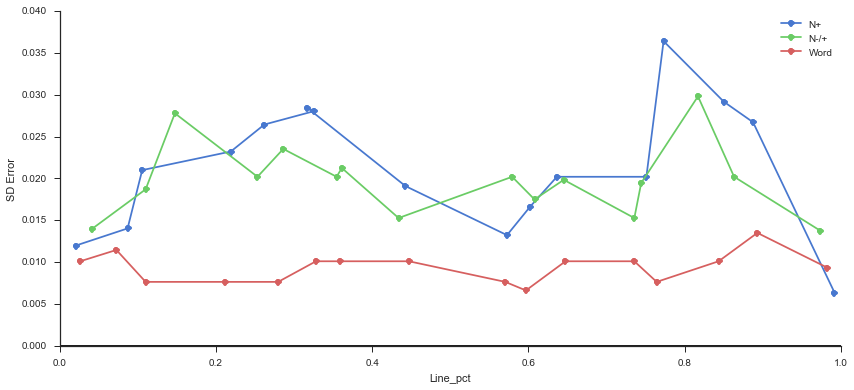

In [95]:
plt.figure(figsize=(14,6))
for key,grp in sd_df.groupby('Task'):
    print 
    plt.plot(median_scores[key],grp.groupby('Line_pct')['Error'].median(),'-o',label=key)
plt.axhline(y=0,color='black')
plt.legend(loc = 'best')
plt.ylim([0,0.04])
plt.xlabel('Line_pct')
plt.ylabel('SD Error')
sns.despine(trim=True)

## Landmark Vs. MAE

In [96]:
plt_df.loc[:,'dist0'] = plt_df.Line_pct

In [97]:
plt_df.loc[:,'dist50'] = abs(plt_df.dist0 - 0.5)

In [98]:
plt_df.loc[:,'dist100'] = abs(plt_df.dist0 - 1)

In [99]:
plt_df.loc[:,'distLand'] = plt_df[['dist0','dist50','dist100']].min(1)

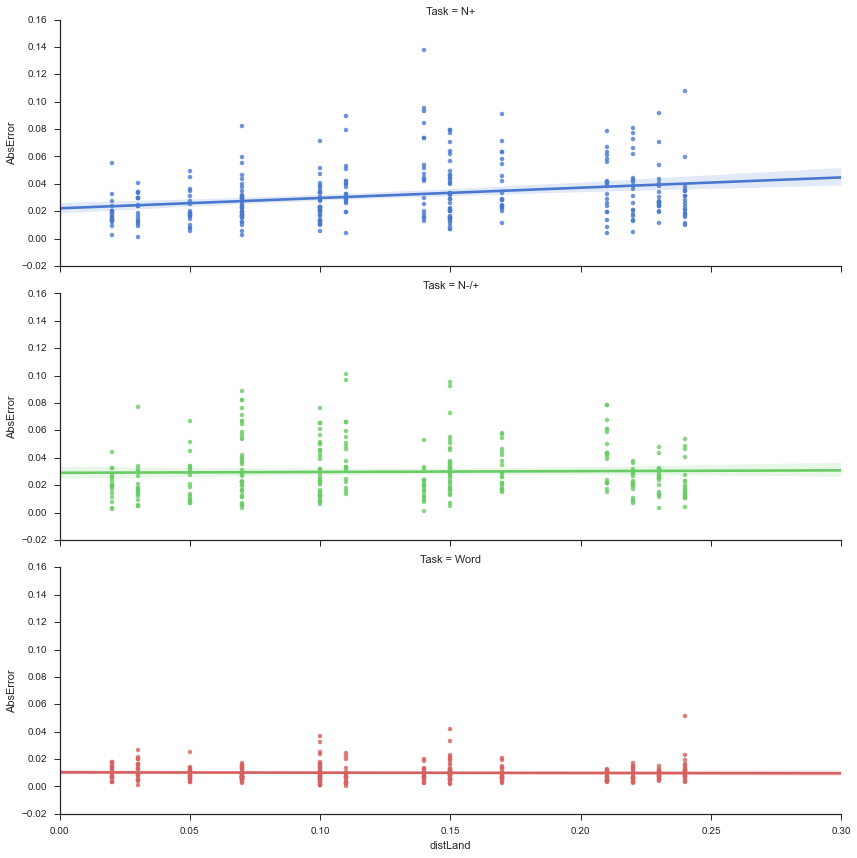

In [100]:
g = sns.lmplot(x='distLand',y='AbsError',hue='Task',row='Task',data=plt_df,size=4,aspect=3)

This is the same result as the other notebook but shows the difference in size of outliers to central tendency as reflected by the median calculated at each landmark distance.

## Landmark distance Vs signed error

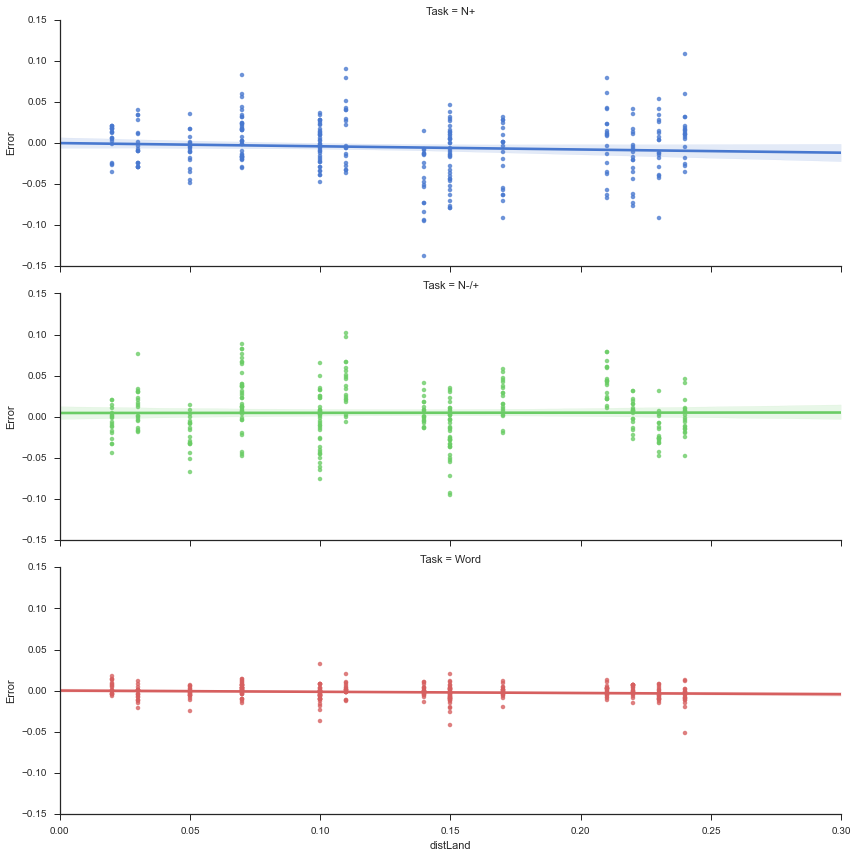

In [101]:
g = sns.lmplot(x='distLand',y='Error',hue='Task',row='Task',data=plt_df,size=4,aspect=3)

## Math Score and MAE

In [105]:
math = pd.read_csv('Math_Results.csv')

In [106]:
plt_df = pd.merge(plt_df,math,on='Subject',how='inner')

In [107]:
sat_df = plt_df.groupby(['Task', 'Subject']).mean()

In [108]:
sat_df.to_csv('plot_data_SAT.csv', sep='\t')
sat_df = pd.read_csv('plot_data_SAT.csv',sep='\t')

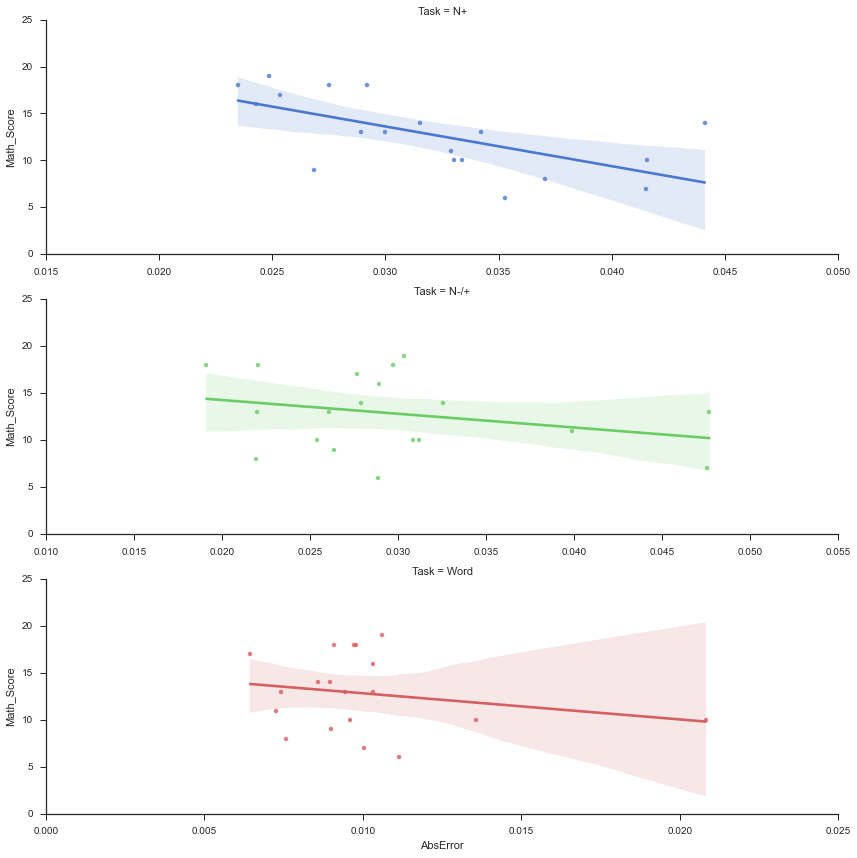

In [109]:
g = sns.lmplot(x='AbsError',y='Math_Score',hue='Task',row='Task',data=sat_df,size=4,aspect=3,sharex=False,truncate=True)

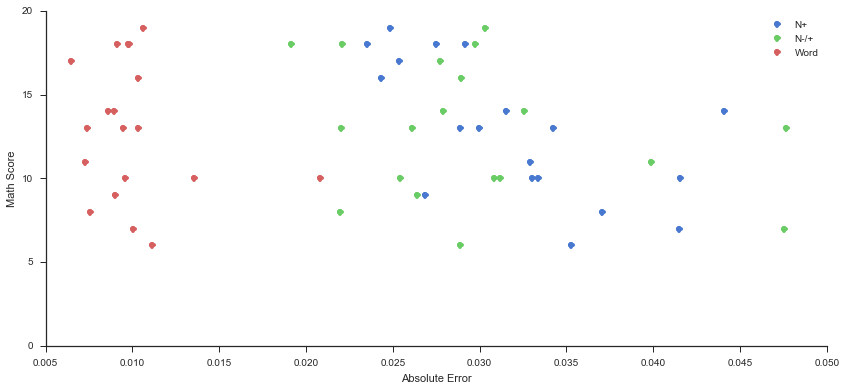

In [110]:
plt.figure(figsize=(14,6))
for key,grp in sat_df.groupby('Task'):
    plt.plot(grp.AbsError,grp.Math_Score,'o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,20])
plt.xlabel('Absolute Error')
plt.ylabel('Math Score')
sns.despine(trim=True)

## Signed Error vs SAT

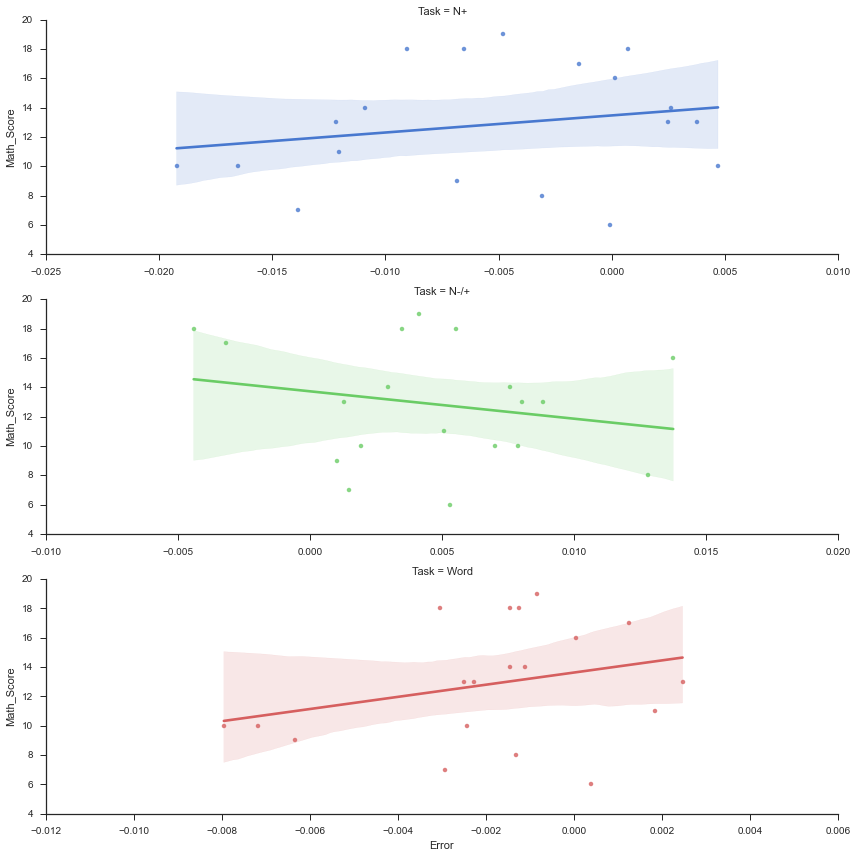

In [111]:
g = sns.lmplot(x='Error',y='Math_Score',hue='Task',row='Task',data=sat_df,size=4,aspect=3,sharex=False,truncate=True)

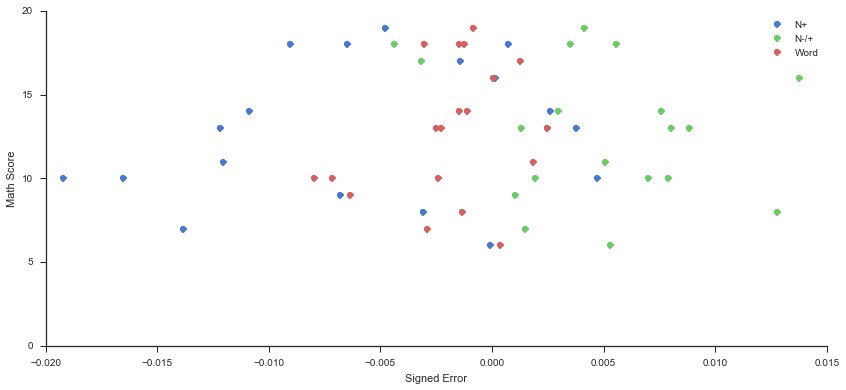

In [112]:
plt.figure(figsize=(14,6))
for key,grp in sat_df.groupby('Task'):
    plt.plot(grp.Error,grp.Math_Score,'o',label=key)
plt.legend(loc = 'best')
plt.ylim([0,20])
plt.xlabel('Signed Error')
plt.ylabel('Math Score')
sns.despine(trim=True)